# Задание из четвёртой лабы

Обучите один из алгоритмов классификации из библиотеки sklearn. Объяснять принцип работы классификатора в этой лабораторной не требуется

1. Выберите один из датасетов первой лабораторной


2. Найдите в данных признак, который будете предсказывать
    
    Если это категория, то у неё должно быть от 2 до 10 значений (например колонка species в датасете миграции птиц содержит 3 категории)
    
    Если признак количественный, то его нужно дискретизировать (например для популярности трека в датасете spotify можно разделить треки на 3 категории: 0-20 - популярные, 21-50 - обычные, 51 - 100 - непопулярные). Полученную категорию записать в датафрейм как отдельную колонку


3. Выделите признаки для предсказания
    
    Используйте от 2 до 5 количественных признаков для предсказания целевой переменной


4. Проверьте нормальность количественных признаков
    
    Используйте статистический тест из лекции. Если распределение является лог-нормальным, логарифмируйте его и проверьте на нормальность
    
    Как минимум 1 из признаков должен быть нормальным


5. Покажите качество предсказания модели с помощью метрик

    Метрика должна учитывать баланс классов в датасете

In [3]:
import pandas as pd

nba_players = pd.read_csv('./nba_players.csv')
nba_players.head()

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college,years_until_retirement
0,LeBron James,97,#23,Los Angeles Lakers,F,12/30/1984,6-9 / 2.06,250 lbs. / 113.4 kg.,$37436858,USA,2003,1,1,No college,Old
1,Kawhi Leonard,97,#2,Los Angeles Clippers,F,06/29/1991,6-7 / 2.01,225 lbs. / 102.1 kg.,$32742000,USA,2011,1,15,San Diego State,6
2,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,12/06/1994,6-11 / 2.11,242 lbs. / 109.8 kg.,$25842697,Greece,2013,1,15,No college,9
3,Kevin Durant,96,#7,Brooklyn Nets,F,09/29/1988,6-10 / 2.08,230 lbs. / 104.3 kg.,$37199000,USA,2007,1,2,Texas,3
4,James Harden,96,#13,Houston Rockets,G,08/26/1989,6-5 / 1.96,220 lbs. / 99.8 kg.,$38199000,USA,2009,1,3,Arizona State,4


In [4]:
nba_players.drop(['full_name',
                  'jersey',
                  'college',
                  'weight',
                  'country',
                  'draft_year',
                  'draft_round',
                  'draft_peak',
                  'years_until_retirement'], axis = 1, inplace = True) 
nba_players.head() 

,rating,team,position,b_day,height,salary
0,97,Los Angeles Lakers,F,12/30/1984,6-9 / 2.06,$37436858
1,97,Los Angeles Clippers,F,06/29/1991,6-7 / 2.01,$32742000
2,96,Milwaukee Bucks,F-G,12/06/1994,6-11 / 2.11,$25842697
3,96,Brooklyn Nets,F,09/29/1988,6-10 / 2.08,$37199000
4,96,Houston Rockets,G,08/26/1989,6-5 / 1.96,$38199000


In [5]:
codes_teams, uniques_teams = pd.factorize(nba_players['team'])

nba_players.team = codes_teams

codes_positions, uniques_positions = pd.factorize(nba_players['position'])

nba_players.position = codes_positions

In [6]:
import yaml 

with open('./consts.yaml') as tem:
    templates = yaml.safe_load(tem)

current_year = templates['current_year']

nba_players['age'] = nba_players.b_day.apply(lambda x : current_year - int(x.split('/')[2]))
nba_players['height'] = nba_players.height.apply(lambda x : float(x.split('/')[1]))
nba_players['salary'] = nba_players.salary.apply(lambda x : int(x[1:]))
nba_players['team'] = nba_players.team.apply(lambda x : x + 1)
nba_players['position'] = nba_players.position.apply(lambda x : x + 1)

nba_players.drop('b_day', axis = 1, inplace = True)

nba_players.head()

,rating,team,position,height,salary,age
0,97,1,1,2.06,37436858,36
1,97,2,1,2.01,32742000,29
2,96,3,2,2.11,25842697,26
3,96,4,1,2.08,37199000,32
4,96,5,3,1.96,38199000,31


In [7]:
nba_players.describe()

,rating,team,position,height,salary,age
count,429.000000,429.000000,429.000000,429.000000,4.290000e+02,429.000000
mean,76.372960,16.088578,2.822844,1.995641,8.530080e+06,26.825175
std,5.657748,8.881967,1.563706,0.083514,9.218059e+06,4.115133
min,67.000000,1.000000,1.000000,1.750000,5.000000e+04,20.000000
25%,72.000000,8.000000,1.000000,1.930000,2.000000e+06,24.000000
50%,75.000000,16.000000,3.000000,2.010000,4.380120e+06,26.000000
75%,79.000000,24.000000,4.000000,2.060000,1.220000e+07,30.000000
max,97.000000,31.000000,7.000000,2.240000,4.023176e+07,40.000000


In [8]:
def discretize(sal) :
    if (sal > 12200000.0):
        return "large"
    if (sal < 2000000.0):
        return "small"
    else :
        return "midle"
    
discretize_salary = nba_players.salary.apply(discretize)

nba_players.drop('salary', axis = 1, inplace = True)

In [9]:
nba_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rating    429 non-null    int64  
 1   team      429 non-null    int64  
 2   position  429 non-null    int64  
 3   height    429 non-null    float64
 4   age       429 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 16.9 KB


In [10]:
nba_players.head()

,rating,team,position,height,age
0,97,1,1,2.06,36
1,97,2,1,2.01,29
2,96,3,2,2.11,26
3,96,4,1,2.08,32
4,96,5,3,1.96,31


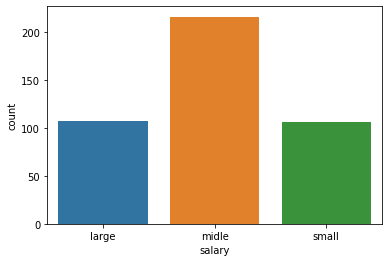

In [25]:
import seaborn as sns

sns.countplot(x=discretize_salary);

In [11]:
from scipy import stats

print(stats.normaltest(nba_players.rating))
print(stats.normaltest(nba_players.team))
print(stats.normaltest(nba_players.position))
print(stats.normaltest(nba_players.height))
print(stats.normaltest(nba_players.age))

# распределение по росту нормальное
# пробовал по логорифмировать остальные не помогло :( 

NormaltestResult(statistic=85.46390370634055, pvalue=2.7653436520763265e-19)
NormaltestResult(statistic=229.96631440610867, pvalue=1.1573089584347985e-50)
NormaltestResult(statistic=20.933186241348515, pvalue=2.84718943429423e-05)
NormaltestResult(statistic=4.846177468074185, pvalue=0.08864738596500196)
NormaltestResult(statistic=18.702872825288992, pvalue=8.684059054090118e-05)


In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

def run(scorer):
    knn_clf = KNeighborsClassifier()
    svm_clf = SVC()
    forest_clf = RandomForestClassifier()

    knn_acc_score = cross_val_score(knn_clf,
                                    nba_players,
                                    discretize_salary,
                                    scoring = scorer,
                                    cv=7).mean()
    svm_acc_score = cross_val_score(svm_clf,
                                    nba_players,
                                    discretize_salary,
                                    scoring = scorer,
                                    cv=7).mean()
    forest_acc_score = cross_val_score(forest_clf,
                                       nba_players,
                                       discretize_salary,
                                       scoring = scorer,
                                       cv=7).mean()

    leaderboard = sorted([
        ('KNN', knn_acc_score),
        ('SVC', svm_acc_score),
        ('Forest', forest_acc_score)
    ], key=lambda pair: pair[1], reverse=True)

    print('Leaderboard:')
    for idx, (leader_name, leader_score) in enumerate(leaderboard):
        print(f'{idx + 1}. {leader_name}: {leader_score}')

In [31]:
run(make_scorer(f1_score, average='macro'))

Leaderboard:
1. SVC: 0.5684822845055526
2. Forest: 0.4736345093299085
3. KNN: 0.4528244461288797


In [32]:
run(make_scorer(f1_score, average='micro'))

Leaderboard:
1. SVC: 0.5684822845055526
2. KNN: 0.5132205182443152
3. Forest: 0.464304600740349


In [33]:
run(make_scorer(f1_score, average='weighted'))

Leaderboard:
1. SVC: 0.5684822845055526
2. Forest: 0.4900657248621289
3. KNN: 0.4710526963044282


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(nba_players,
                                                    discretize_salary,
                                                    shuffle=True,
                                                    stratify=discretize_salary,
                                                    test_size=0.2)

knn_clf = KNeighborsClassifier()
svm_clf = SVC()
forest_clf = RandomForestClassifier()

for clf in [knn_clf, svm_clf, forest_clf]:
    clf.fit(X_train, y_train)

knn_pred = knn_clf.predict(X_test)
svm_pred = svm_clf.predict(X_test)
forest_pred = forest_clf.predict(X_test)

knn_acc_score = accuracy_score(y_test, knn_pred)
svm_acc_score = accuracy_score(y_test, svm_pred)
forest_acc_score = accuracy_score(y_test, forest_pred)

leaderboard = sorted([
    ('KNN', knn_acc_score),
    ('SVC', svm_acc_score),
    ('Forest', forest_acc_score)
], key=lambda pair: pair[1], reverse=True)

print('Leaderboard:')
for idx, (leader_name, leader_score) in enumerate(leaderboard):
    print(f'{idx + 1}. {leader_name}: {leader_score}')

Leaderboard:
1. Forest: 0.7325581395348837
2. KNN: 0.6744186046511628
3. SVC: 0.6046511627906976
